In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# import json
from pylab import figure
import ast
import os
import pandas as pd
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from dtw import dtw
%pylab inline
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D

Populating the interactive namespace from numpy and matplotlib


In [2]:
def draw_plot_accelerometer(filepath):
    fig = figure()
    #ax = fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)
    with open(filepath) as f:
        xList = []
        yList = []
        zList = []
        i = 0
        for line in f:
            x = ast.literal_eval(line)[0][0]
            y = ast.literal_eval(line)[0][1]
            z = ast.literal_eval(line)[0][2]
            xList.append(x)
            yList.append(y)
            zList.append(z)
            #ax.plot(x, y, z, 'gray')
            ax.scatter(x, y, z, cmap='Greens')
            ax.text(x, y, z, str(i))
            i += 1            
                       

#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')

        #ax.plot_surface(x, y, z)
        ax.plot3D(xList, yList, zList, 'gray')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

#         ax.scatter3D(x, y, z, c=z, cmap='Greens');
        
        # plt.plot(x,y)
        plt.show()

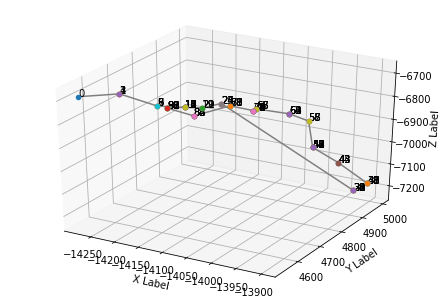

In [3]:
draw_plot_accelerometer("Sensor_Data_For_Bite_Using_Accelerometer/bite-9.txt")
#draw_plot_gyroscope("Sensor_Data_For_Bite_Using_Accelerometer/bite-1.txt")

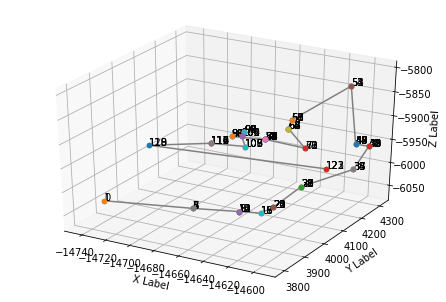

In [5]:
draw_plot_accelerometer("Sensor_Data_For_Bite_Using_Accelerometer/bite-5.txt")

In [6]:
def draw_plot_gyroscope(filepath):
    with open(filepath) as f:
        x = []
        y = []
        z = []
        for line in f:
            x.append(ast.literal_eval(line)[1][0])
            y.append(ast.literal_eval(line)[1][1])
            z.append(ast.literal_eval(line)[1][2])

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        #ax.plot_surface(x, y, z)
        ax.plot3D(x, y, z, 'gray')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        ax.scatter3D(x, y, z, c=z, cmap='Greens');

        # plt.plot(x,y)
        plt.show()

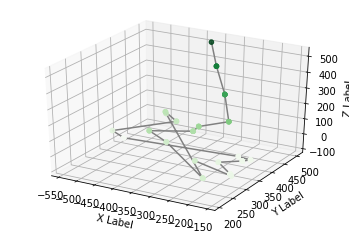

In [7]:
draw_plot_gyroscope("Sensor_Data_For_Bite_Using_Accelerometer/bite-5.txt")

In [8]:
def avg(lst):
    return sum(lst)/len(lst)

In [9]:
def get_avg_data(filepath):
    fig = figure()
    #ax = fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)
    with open(filepath) as f:
        xList = []
        yList = []
        zList = []
        data_index = 0
        x5 = []
        y5 = []
        z5 = []
        i = 0
        for line in f:
            if i < 5: 
                x5.append(ast.literal_eval(line)[0][0])
                y5.append(ast.literal_eval(line)[0][1])
                z5.append(ast.literal_eval(line)[0][2])
                i += 1
            else:
                x = avg(x5)
                y = avg(y5)
                z = avg(z5)
                xList.append(x)
                yList.append(y)
                zList.append(z)
                ax.scatter(x, y, z, cmap='Greens')
                ax.text(x, y, z, str(data_index))
                data_index += 1
                x5 = []
                y5 = []
                z5 = []
                i = 0
        ax.plot3D(xList, yList, zList, 'gray')
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

#         ax.scatter3D(x, y, z, c=z, cmap='Greens');
        # plt.plot(x,y)
        plt.show()    



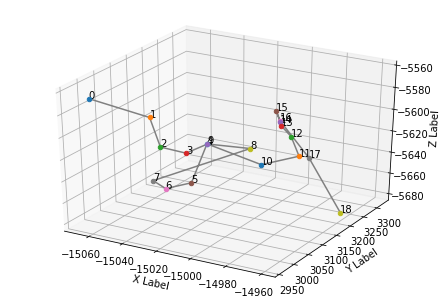

In [10]:
get_avg_data("Sensor_Data_For_Bite_Using_Accelerometer/bite-1.txt")

In [11]:
filepaths = ["Sensor_Data_For_Bite_Using_Accelerometer/bite-4.txt", "Sensor_Data_For_BiteNew_Using_Accelerometer/bite-4.txt"] 

--> Average of different on gestures on 1 -2
--> All the samples of 1 gesture in 1 -8
--> Same gesture diff position in 1 -4 graphs 

In [12]:
dir_path = os.path.dirname(os.path.realpath("Classifier.py"))
print(dir_path)

/Users/sapkotashardul/Documents/github/GestureiOSData/Exp1


In [13]:
for fname in os.listdir("Sensor_Data_For_Bite_Using_Accelerometer"):
    print(fname)

bite-12.txt
bite-10.txt
bite-11.txt
bite.txt
bite-9.txt
bite-7.txt
bite-6.txt
bite-4.txt
bite-5.txt
bite-1.txt
bite-2.txt
bite-3.txt


In [14]:
def load_dataframe(filepath):
    data = pd.read_csv(filepath, sep=", ", header=None)
    data[0] = data[0].apply(lambda x: x.replace("[(", ""))
    data[2] = data[2].apply(lambda x: x.replace(")", ""))
    data[3] = data[3].apply(lambda x: x.replace("(", ""))
    data[5] = data[5].apply(lambda x: x.replace(")]", ""))
    for i in range(len(data.columns)):
        data[i] = data[i].apply(lambda x: int(x))
    data.columns = ['accX', 'accY', 'accZ', 'gyrX', 'gyrY', 'gyrZ']
    return data 

In [15]:
df1 = load_dataframe("Sensor_Data_For_Bite_Using_Accelerometer/bite-1.txt")
df1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,accX,accY,accZ,gyrX,gyrY,gyrZ
0,-15085,2911,-5555,-376,433,247
1,-15085,2911,-5555,-376,433,247
2,-15045,2998,-5571,-383,441,261
3,-15045,2998,-5571,-383,441,261
4,-15045,2998,-5571,-383,441,261
5,-15045,2998,-5571,-383,441,261
6,-15045,2998,-5571,-383,441,261
7,-15041,3055,-5592,-366,415,198
8,-15041,3055,-5592,-366,415,198
9,-15041,3055,-5592,-366,415,198


In [16]:
df5 = load_dataframe("Sensor_Data_For_Bite_Using_Accelerometer/bite-5.txt")
df5

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,accX,accY,accZ,gyrX,gyrY,gyrZ
0,-14727,3792,-6012,-373,503,512
1,-14727,3792,-6012,-373,503,512
2,-14674,3904,-6030,-340,477,396
3,-14674,3904,-6030,-340,477,396
4,-14674,3904,-6030,-340,477,396
5,-14674,3904,-6030,-340,477,396
6,-14674,3904,-6030,-340,477,396
7,-14674,3904,-6030,-340,477,396
8,-14652,4000,-6051,-270,411,308
9,-14652,4000,-6051,-270,411,308


In [17]:
def get_avg_from_dataframes(dataframe_lsts):
    dfs = dataframe_lsts
    averages = pd.concat([each.stack() for each in dfs],axis=1)\
             .apply(lambda x:x.mean(),axis=1)\
             .unstack()
    return averages

In [18]:
def gesture_overall_dataframe(root_dir):
    dataframes = []
    for fname in os.listdir(root_dir):
        if fname == '.DS_Store':
            continue
        filepath = os.path.join(root_dir, fname)
        dataframes.append(load_dataframe(filepath))
    bite_avg = get_avg_from_dataframes(dataframes)
    return bite_avg

In [19]:
def compare_gesture_plots(df1, df2, gesture_name):
    plot3D = plt.figure(figsize=plt.figaspect(0.35))
    
    ax = plot3D.add_subplot(121, projection='3d')
    ax.set_title("{} PosA".format(gesture_name))
    ax.scatter3D(df1['accX'], df1['accY'], df1['accZ'], cmap='gray')
    ax.plot3D(df1['accX'], df1['accY'], df1['accZ'], 'gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    bx = plot3D.add_subplot(122, projection='3d')
    bx.set_title("{} PosB".format(gesture_name))
    bx.scatter3D(df2['accX'], df2['accY'], df2['accZ'], cmap='gray')
    bx.plot3D(df2['accX'], df2['accY'], df2['accZ'], 'gray')

    bx.set_xlabel('X')
    bx.set_ylabel('Y')
    bx.set_zlabel('Z')
    
    
    plt.show()

In [20]:
def compare_gestureGyr_plots(df1, df2, gesture_name):
    plot3D = plt.figure(figsize=plt.figaspect(0.35))
    
    ax = plot3D.add_subplot(121, projection='3d')
    ax.set_title("{} PosA".format(gesture_name))
    ax.scatter3D(df1['gyrX'], df1['gyrY'], df1['gyrZ'], cmap='gray')
    ax.plot3D(df1['gyrX'], df1['gyrY'], df1['gyrZ'], 'gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    bx = plot3D.add_subplot(122, projection='3d')
    bx.set_title("{} PosB".format(gesture_name))
    bx.scatter3D(df2['gyrX'], df2['gyrY'], df2['gyrZ'], cmap='gray')
    bx.plot3D(df2['gyrX'], df2['gyrY'], df2['gyrZ'], 'gray')

    bx.set_xlabel('X')
    bx.set_ylabel('Y')
    bx.set_zlabel('Z')
    
    
    plt.show()

In [21]:
def compare_gesture_plots_with_control(df1, df2, control1, control2, gesture_name):
    plot3D = plt.figure(figsize=plt.figaspect(0.35))
    
    ax = plot3D.add_subplot(121, projection='3d')
    ax.set_title("{} PosA".format(gesture_name))
    ax.scatter3D(df1['accX'], df1['accY'], df1['accZ'], cmap='gray')
    ax.plot3D(df1['accX'], df1['accY'], df1['accZ'], 'gray')

    ax.scatter3D(control1['accX'], control1['accY'], control1['accZ'], cmap='gray')
    ax.plot3D(control1['accX'], control1['accY'], control1['accZ'], 'green')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    bx = plot3D.add_subplot(122, projection='3d')
    bx.set_title("{} PosB".format(gesture_name))
    bx.scatter3D(df2['accX'], df2['accY'], df2['accZ'], cmap='gray')
    bx.plot3D(df2['accX'], df2['accY'], df2['accZ'], 'gray')
    
    bx.scatter3D(control2['accX'], control2['accY'], control2['accZ'], cmap='gray')
    bx.plot3D(control2['accX'], control2['accY'], control2['accZ'], 'green')

    bx.set_xlabel('X')
    bx.set_ylabel('Y')
    bx.set_zlabel('Z')

    x_axis = mlines.Line2D([], [], color='orange', marker='', linestyle='solid',
                          markersize=10, label='control')
    y_axis = mlines.Line2D([], [], color='xkcd:blue', marker='', linestyle='solid',
                          markersize=10, label='gesture')
    
    #bx.legend(handles=[x_axis, y_axis], loc='best')
    legend(bbox_to_anchor=(1.05, 1), handles=[x_axis, y_axis], loc=2, borderaxespad=0.)
    

    
    plt.show()

In [22]:
def compare_gestureGyr_plots_with_control(df1, df2, control1, control2, gesture_name):
    plot3D = plt.figure(figsize=plt.figaspect(0.35))
    
    ax = plot3D.add_subplot(121, projection='3d')
    ax.set_title("{} PosA".format(gesture_name))
    ax.scatter3D(df1['gyrX'], df1['gyrY'], df1['gyrZ'], cmap='gray')
    ax.plot3D(df1['gyrX'], df1['gyrY'], df1['gyrZ'], 'gray')

    ax.scatter3D(control1['gyrX'], control1['gyrY'], control1['gyrZ'], cmap='gray')
    ax.plot3D(control1['gyrX'], control1['gyrY'], control1['gyrZ'], 'green')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    bx = plot3D.add_subplot(122, projection='3d')
    bx.set_title("{} PosB".format(gesture_name))
    bx.scatter3D(df2['gyrX'], df2['gyrY'], df2['gyrZ'], cmap='gray')
    bx.plot3D(df2['gyrX'], df2['gyrY'], df2['gyrZ'], 'gray')
    
    bx.scatter3D(control2['gyrX'], control2['gyrY'], control2['gyrZ'], cmap='gray')
    bx.plot3D(control2['gyrX'], control2['gyrY'], control2['gyrZ'], 'green')

    bx.set_xlabel('X')
    bx.set_ylabel('Y')
    bx.set_zlabel('Z')
    
    
    x_axis = mlines.Line2D([], [], color='orange', marker='', linestyle='solid',
                          markersize=10, label='control')
    y_axis = mlines.Line2D([], [], color='xkcd:blue', marker='', linestyle='solid',
                          markersize=10, label='gesture')
    
    #bx.legend(handles=[x_axis, y_axis], loc='best')
    legend(bbox_to_anchor=(1.05, 1), handles=[x_axis, y_axis], loc=2, borderaxespad=0.)

    
    plt.show()

In [23]:
bite = gesture_overall_dataframe("Sensor_Data_For_Bite_using_Accelerometer")
bite_new = gesture_overall_dataframe("Sensor_Data_For_BiteNew_using_Accelerometer")
left_bite = gesture_overall_dataframe("Sensor_Data_For_LeftBite_using_Accelerometer")
left_bite_new = gesture_overall_dataframe("Sensor_Data_For_LeftBite_new_using_Accelerometer")
right_bite = gesture_overall_dataframe("Sensor_Data_For_RightBite_Using_Accelerometer")
right_bite_new = gesture_overall_dataframe("Sensor_Data_For_RightBite_new_Using_Accelerometer")
front_bite = gesture_overall_dataframe("Sensor_Data_For_Front_Bite_using_Accelerometer")
front_bite_new = gesture_overall_dataframe("Sensor_Data_For_Frontbite_New_Using_Accelerometer")
still = gesture_overall_dataframe("Sensor_Data_For_Still_posA_using_Accelerometer")
still_new = gesture_overall_dataframe("Sensor_Data_For_Still_PosB_using_Accelerometer")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [24]:
front_bite_new_again = gesture_overall_dataframe("Sensor_Data_for_Frontbite_New_Again_using_Accelerometer")
still_new_again = gesture_overall_dataframe("Sensor_Data_For_Still_New_Again_using_Accelerometer")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


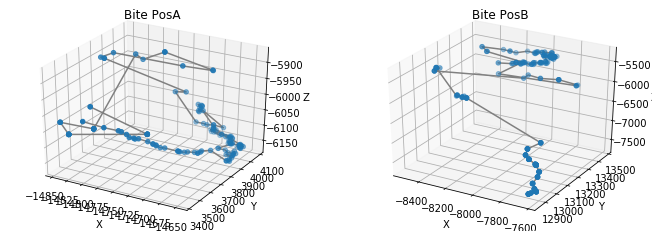

In [25]:
compare_gesture_plots(bite, bite_new, "Bite")

In [26]:
bite.std()

accX     57.283145
accY    207.878154
accZ     76.566002
gyrX    113.762161
gyrY     99.143861
gyrZ    147.491910
dtype: float64

In [27]:
bite_new.std()

accX    223.486261
accY    207.745837
accZ    885.079355
gyrX     24.085717
gyrY     50.772481
gyrZ     28.563331
dtype: float64

In [28]:
still.std()

accX     44.869717
accY    531.297304
accZ    329.375967
gyrX    205.742791
gyrY    134.928762
gyrZ     93.889884
dtype: float64

In [29]:
still_new.std()

accX    15.997413
accY    13.277899
accZ    56.345577
gyrX    31.660491
gyrY    22.048703
gyrZ    13.957908
dtype: float64

In [30]:
still_new_again.std()

accX    20.912922
accY    44.145828
accZ    24.681737
gyrX    12.423527
gyrY    19.339833
gyrZ     9.234659
dtype: float64

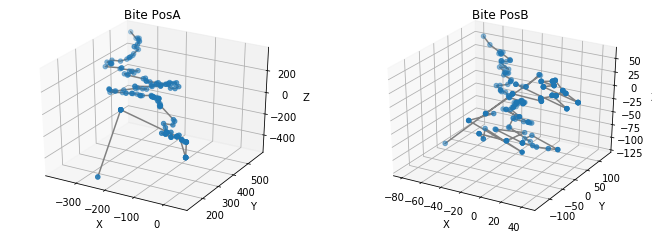

In [31]:
compare_gestureGyr_plots(bite, bite_new, "Bite")

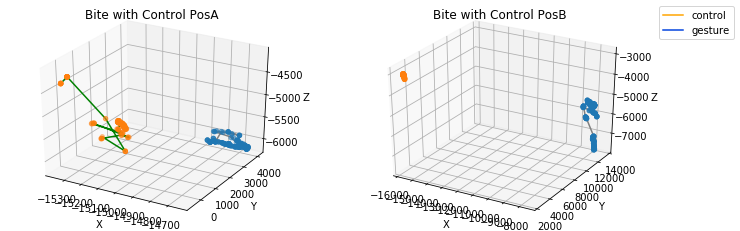

In [32]:
compare_gesture_plots_with_control(bite, bite_new, still, still_new, "Bite with Control")

In [ ]:
ax.text(df1['gyrX'][0], df1['gyrY'][0], df1['gyrZ'][0] , str(0))

In [42]:
df1['gyrX'][len(bite)-1], df1['gyrY'][len(bite)-1], df1['gyrZ'][len(bite)-1] 

(-243.0, 135.0, -505.0)

In [43]:
df1['gyrX'][0], df1['gyrY'][0], df1['gyrZ'][0] 

(-377.9166666666667, 573.25, 345.8333333333333)

In [58]:
def compare_gestureGyr_plots_with_control_indexed(df1, df2, control1, control2, gesture_name):
    plot3D = plt.figure(figsize=plt.figaspect(0.35))
    
    ax = plot3D.add_subplot(121, projection='3d')
    ax.set_title("{} PosA".format(gesture_name))
    ax.scatter3D(df1['gyrX'], df1['gyrY'], df1['gyrZ'], cmap='gray')
    ax.plot3D(df1['gyrX'], df1['gyrY'], df1['gyrZ'], 'gray')

    ax.scatter3D(control1['gyrX'], control1['gyrY'], control1['gyrZ'], cmap='gray')
    ax.plot3D(control1['gyrX'], control1['gyrY'], control1['gyrZ'], 'green')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.text(df1['gyrX'][0], df1['gyrY'][0], df1['gyrZ'][0] , str('Δ')) #label
    ax.text(control1['gyrX'][0], control1['gyrY'][0], control1['gyrZ'][0] , str('Δ')) #label
    
#     ax.text(df1['gyrX'][len(bite)-1], df1['gyrY'][len(bite)-1], df1['gyrZ'][len(bite)-1], str('end')) #label
#     ax.text(control1['gyrX'][len(bite)-1], control1['gyrY'][len(bite)-1], control1['gyrZ'][len(bite)-1], str('end')) #label
    
    bx = plot3D.add_subplot(122, projection='3d')
    bx.set_title("{} PosB".format(gesture_name))
    bx.scatter3D(df2['gyrX'], df2['gyrY'], df2['gyrZ'], cmap='gray')
    bx.plot3D(df2['gyrX'], df2['gyrY'], df2['gyrZ'], 'gray')
    
    bx.scatter3D(control2['gyrX'], control2['gyrY'], control2['gyrZ'], cmap='gray')
    bx.plot3D(control2['gyrX'], control2['gyrY'], control2['gyrZ'], 'green')

    bx.set_xlabel('X')
    bx.set_ylabel('Y')
    bx.set_zlabel('Z')
    
    bx.text(df2['gyrX'][0], df2['gyrY'][0], df2['gyrZ'][0] , str('Δ')) #label
    bx.text(control2['gyrX'][0], control2['gyrY'][0], control2['gyrZ'][0] , str('Δ')) #label

    
    
    x_axis = mlines.Line2D([], [], color='orange', marker='', linestyle='solid',
                          markersize=10, label='control')
    y_axis = mlines.Line2D([], [], color='xkcd:blue', marker='', linestyle='solid',
                          markersize=10, label='gesture')
    
    #bx.legend(handles=[x_axis, y_axis], loc='best')
    legend(bbox_to_anchor=(1.05, 1), handles=[x_axis, y_axis], loc=2, borderaxespad=0.)

    
    plt.show()

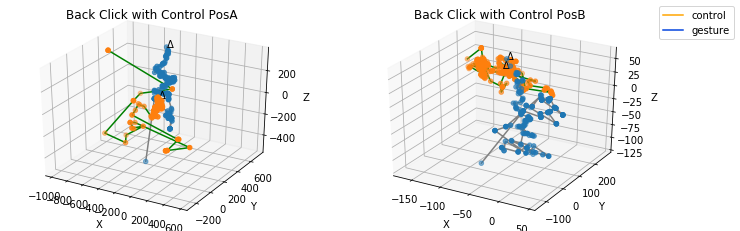

In [63]:
compare_gestureGyr_plots_with_control_indexed(bite, bite_new, still, still_new, "Back Click with Control")

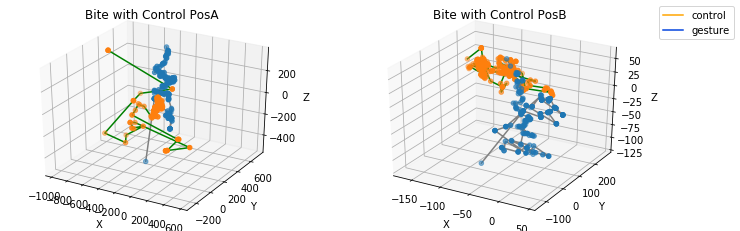

In [33]:
compare_gestureGyr_plots_with_control(bite, bite_new, still, still_new, "Bite with Control")

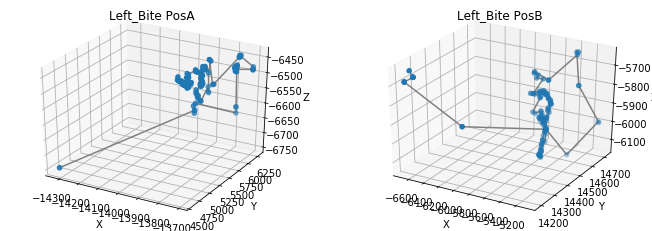

In [37]:
compare_gesture_plots(left_bite, left_bite_new, "Left_Bite")

In [38]:
left_bite.std()

accX     91.524080
accY    246.047885
accZ     50.682874
gyrX     64.014000
gyrY     28.469500
gyrZ     31.264900
dtype: float64

In [39]:
left_bite_new.std()

accX    306.891900
accY    106.417978
accZ    132.352471
gyrX     21.917258
gyrY     39.165506
gyrZ     16.606017
dtype: float64

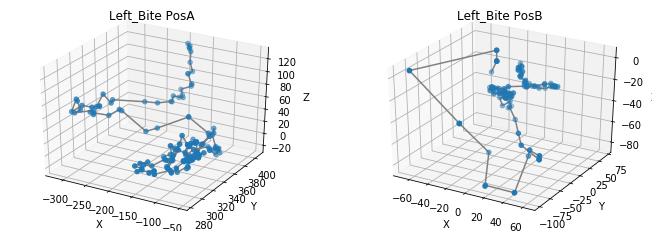

In [40]:
compare_gestureGyr_plots(left_bite, left_bite_new, "Left_Bite")

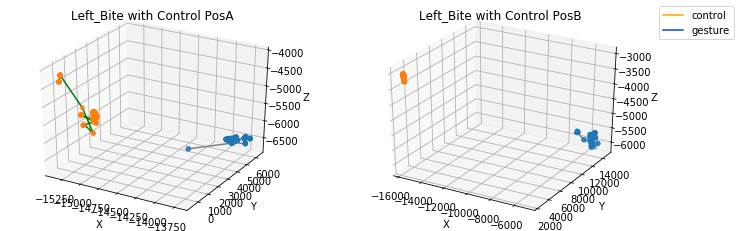

In [41]:
compare_gesture_plots_with_control(left_bite, left_bite_new, still, still_new, "Left_Bite with Control")

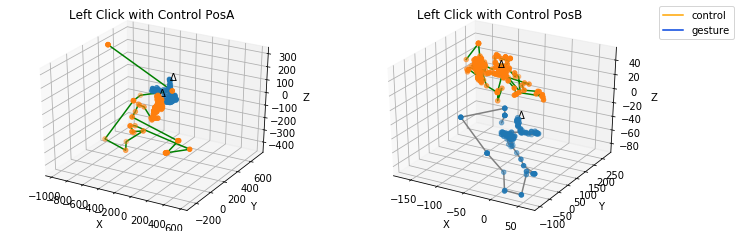

In [64]:
compare_gestureGyr_plots_with_control_indexed(left_bite, left_bite_new, still, still_new, "Left Click with Control")

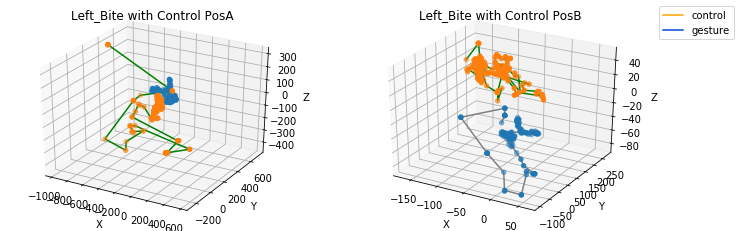

In [42]:
compare_gestureGyr_plots_with_control(left_bite, left_bite_new, still, still_new, "Left_Bite with Control")

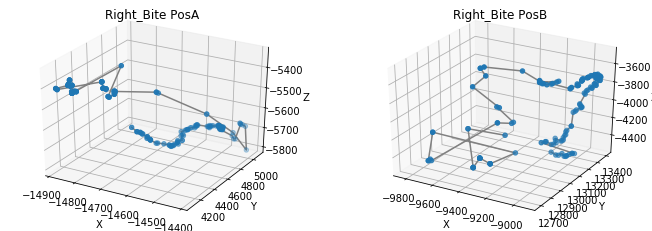

In [43]:
compare_gesture_plots(right_bite, right_bite_new, "Right_Bite")

In [44]:
right_bite.std()

accX    135.474646
accY    321.548123
accZ    127.892388
gyrX    114.918067
gyrY     67.947699
gyrZ     86.933314
dtype: float64

In [45]:
right_bite_new.std()

accX    242.562382
accY    197.968790
accZ    334.082238
gyrX     45.873323
gyrY     76.101086
gyrZ     27.088088
dtype: float64

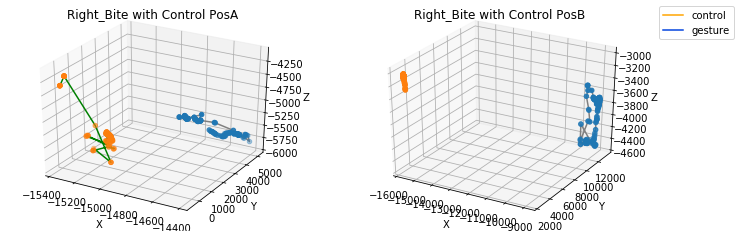

In [46]:
compare_gesture_plots_with_control(right_bite, right_bite_new, still, still_new, "Right_Bite with Control")

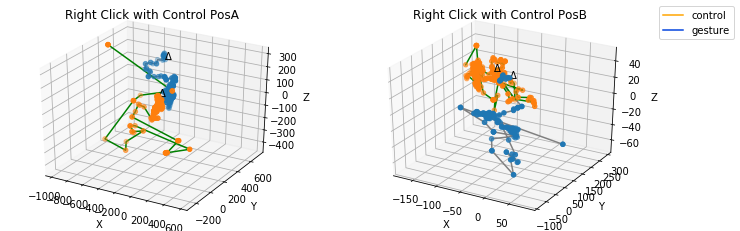

In [65]:
compare_gestureGyr_plots_with_control_indexed(right_bite, right_bite_new, still, still_new, "Right Click with Control")

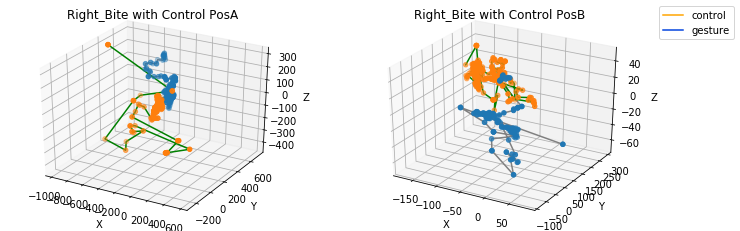

In [47]:
compare_gestureGyr_plots_with_control(right_bite, right_bite_new, still, still_new, "Right_Bite with Control")

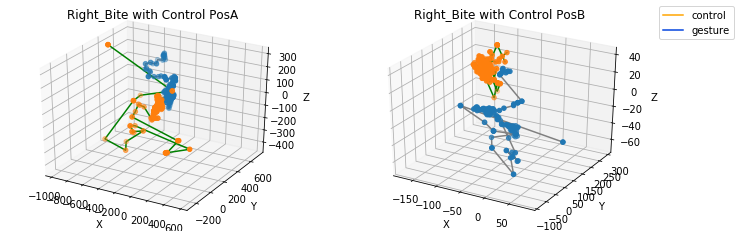

In [48]:
compare_gestureGyr_plots_with_control(right_bite, right_bite_new, still, still_new_again, "Right_Bite with Control")

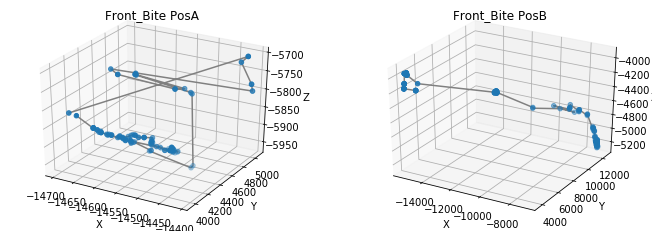

In [49]:
compare_gesture_plots(front_bite, front_bite_new, "Front_Bite")

In [50]:
front_bite.std()

accX     62.044042
accY    261.728324
accZ     61.295731
gyrX    112.462549
gyrY    108.516437
gyrZ    171.796068
dtype: float64

In [51]:
front_bite_new.std()

accX    3298.731998
accY    3381.870982
accZ     463.236135
gyrX     330.012563
gyrY     172.957212
gyrZ     169.356896
dtype: float64

In [52]:
front_bite_new_again.std()

accX     14.960799
accY     23.776680
accZ     55.587588
gyrX    105.234016
gyrY    104.088697
gyrZ     34.774925
dtype: float64

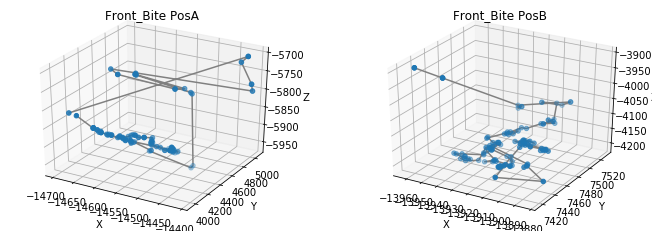

In [53]:
compare_gesture_plots(front_bite, front_bite_new_again, "Front_Bite")

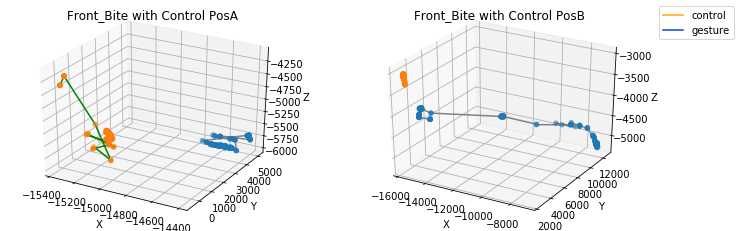

In [54]:
compare_gesture_plots_with_control(front_bite, front_bite_new, still, still_new, "Front_Bite with Control")

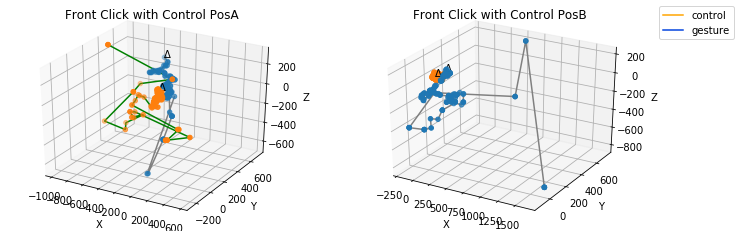

In [66]:
compare_gestureGyr_plots_with_control_indexed(front_bite, front_bite_new, still, still_new, "Front Click with Control")

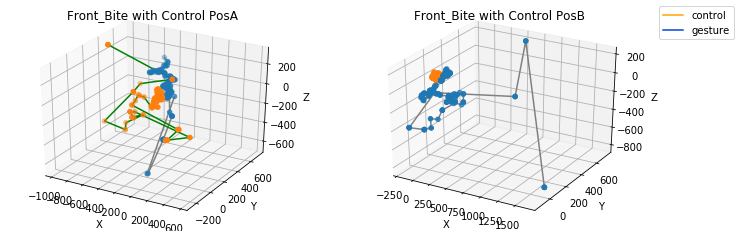

In [63]:
compare_gestureGyr_plots_with_control(front_bite, front_bite_new, still, still_new, "Front_Bite with Control")

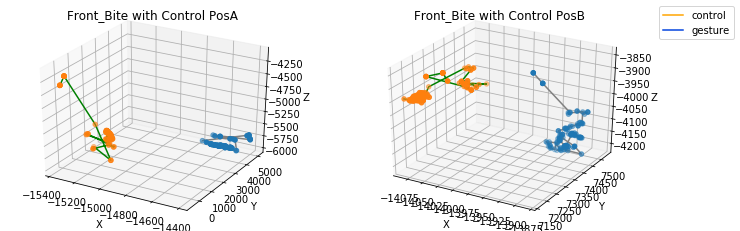

In [56]:
compare_gesture_plots_with_control(front_bite, front_bite_new_again, still, still_new_again, "Front_Bite with Control")

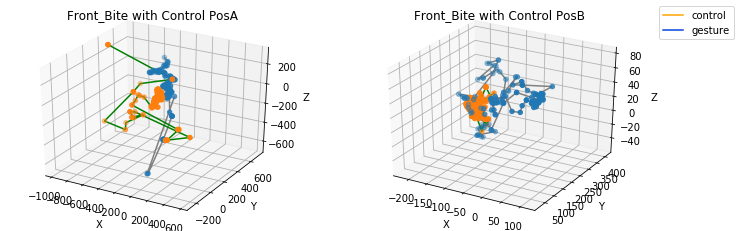

In [57]:
compare_gestureGyr_plots_with_control(front_bite, front_bite_new_again, still, still_new_again, "Front_Bite with Control")

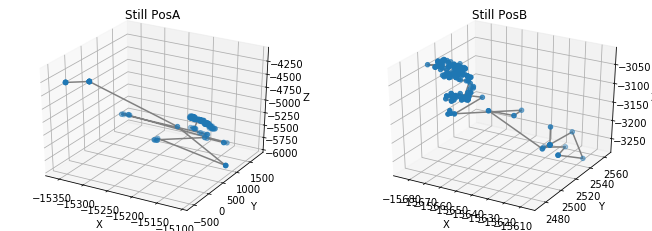

In [58]:
compare_gesture_plots(still, still_new, "Still")

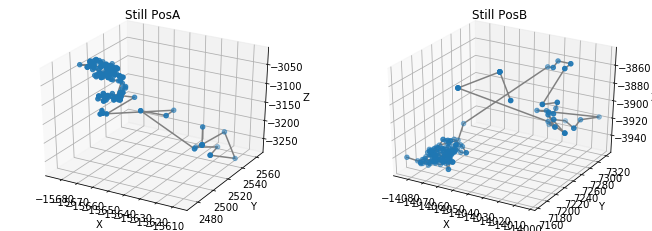

In [59]:
compare_gesture_plots(still_new, still_new_again, "Still")

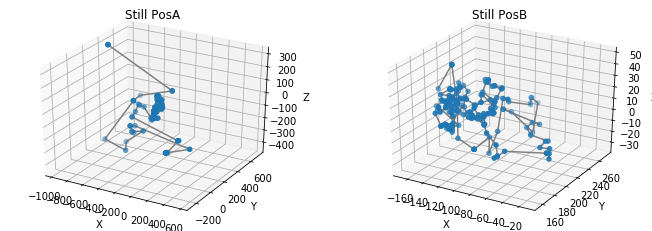

In [60]:
compare_gestureGyr_plots(still, still_new, "Still")

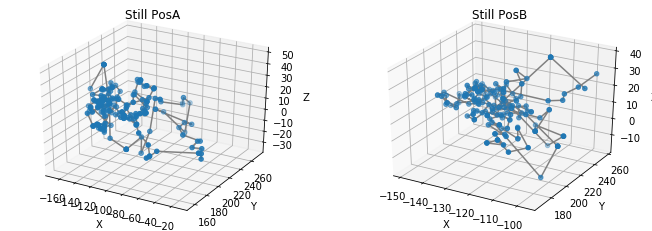

In [61]:
compare_gestureGyr_plots(still_new, still_new_again, "Still")

In [461]:
t = (still.iloc[:]['accX'], still.iloc[:]['accY'], still.iloc[:]['accZ'])

In [474]:
def plot_timeseries(dataframe):
    return (dataframe.iloc[:]['accX'], dataframe.iloc[:]['accY'], dataframe.iloc[:]['accZ'])

In [482]:
x = array([0, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)


In [500]:
x = still.as_matrix(columns=still.columns[:3])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [501]:
y = still_new.as_matrix(columns=still_new.columns[:3])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


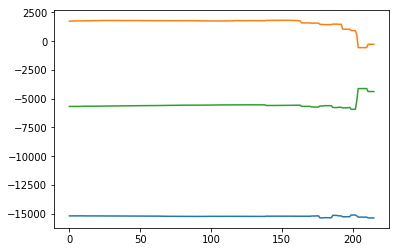

In [502]:
plot(x)

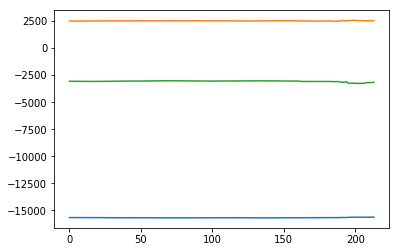

In [503]:
plot(y)

In [504]:
dist, cost, acc, path = dtw(x, y, dist=lambda x, y: norm(x - y, ord=1))

In [505]:
print('Minimum distance found:', dist)


Minimum distance found: 1923.5112500419475


(-0.5, 213.5)

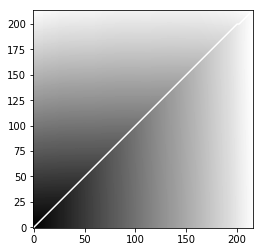

In [506]:
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))
